#Objective

Predicting the number of shares an article can get it

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
missing_values = ["n/a", "na", "--","-"]

In [ ]:
newsdat=pd.read_csv("/kaggle/input/online-news-popularity/OnlineNewsPopularity.csv",na_values = missing_values)

#Data Preprocessing

checking for missing values and duplicate values

In [ ]:
newsdat.shape

In [ ]:
newsdat.drop_duplicates()

In [ ]:
newsdat.isnull().values.any()

In [ ]:
newsdat=newsdat.drop(['url'],axis=1)


In [ ]:
newsdat.head(10)

In [ ]:
newsdat.isnull().sum()

In [ ]:
newsdat.describe()

As early in Data Preprocessing we analyzed that our data has no missing values and no duplicate values but we have some outliers which has been found out in or Exploratory analysis. But processing the data for our 2 models has been different. For Model1 there is no change in data as we have the whole data in numerical so need not to be having a one hot encoding but as the range of the data in different columns in very variance manner we will perform normalization which we will discuss in our later section of report.
But in Second model where we need to classify the articles into different categories we have choosed neural networks and  need to change the every different categories into one category and needed to perform one hot encoded which will finally placed into a vector of one column.
Then we performed cross-tabulation of every category in our data set and found out the distribution of categories in our data set. The below table shows the number of articles placed in each category:

Category	Number of articles in that category
    World	    8427
technology	    7346
Social media	2323
Entertainment	7057
Lifestyle	    2099
Business	    6258

As we can observe the data classification if categories with Social media and life style has less variety of assumptions. We are dropping time delta and Url which is metadata of articles which won’t be any use in our regression model.


#Exploratory Analysis

***Density Distribution of Shares:***
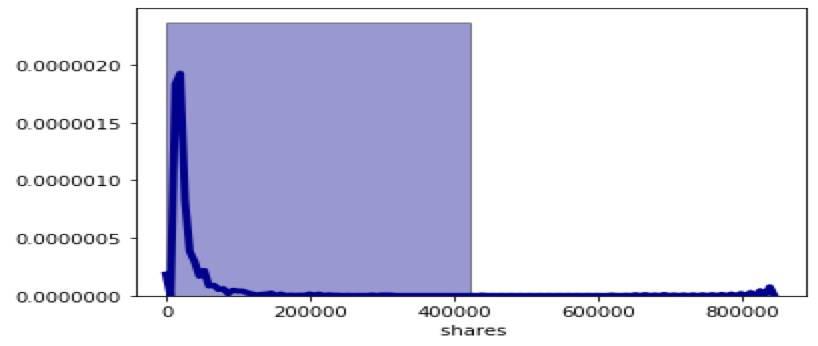

The above graph represents the density distribution of shares in our whole dataset. As we can see we have maximum examples of shares between 0-10,000 shares and gradually decreased with the number of shares increasing. We can actually consider that the shares which are above 20,000 as outliers but in our project these are considered as anomalies. As our project says about the maximum of shares of an article if the article has been shared the most of the time then the features of article has been so peculiar that it has reached maximum of shares. So considering anomality condition we are not classifying these peculiar data  as outliers but as anamolies.

***Tokens Vs Images:***
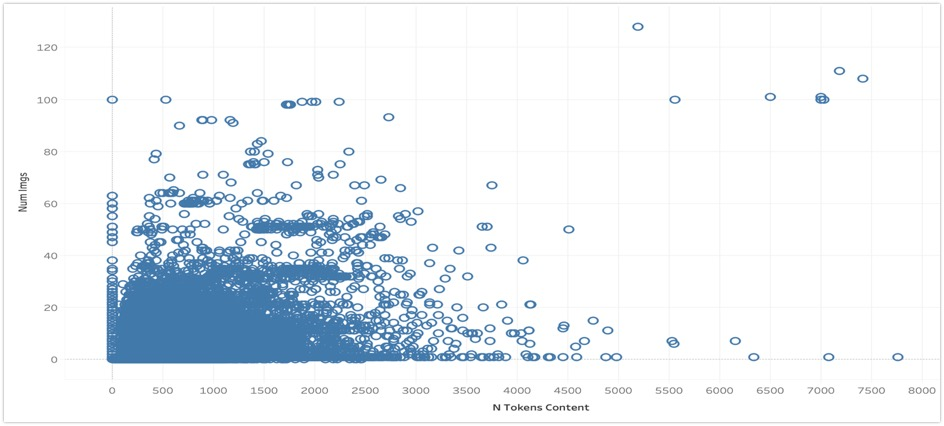
From the above Analysis we are able to Analyze that for what token lengths the number of images should be more. By observing the above graph we can say that till min of 2000 tokens or words we need to have minimum of 30 images and gradually the increase in tokens we need to increase in images so that people who are reading these articles have more understanding in a visualizing way.


***Token length Vs Shares:***
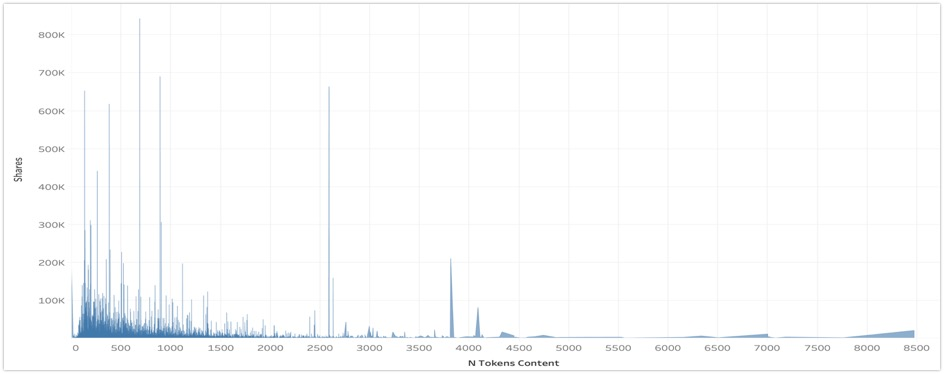
Plotted this graph is mainly to analyze at what token length or at what length of articles the people are liking the articles and shared most. By observing the above graph we can actually say that people are reading the short articles most and shared a lot and the other one are very length article who has more 2000 tokens has been read and shared a lot. By this we can understood that users are of two types who are concentrating on the content and the other are who are just observing what their need is presented in article in a straight-forward manner.

#Pearson-Correlational Analysis:

In [ ]:
plt.figure(figsize=(40,30))
cor = newsdat.corr(method ='pearson')
sns.heatmap(cor, cmap="RdYlGn")
plt.show()

By the above Pearson correlation graph we can say that number of unique words and number of non-stop-words and number of non-stop-unique tokens are strongly correlated which implies that they are strongly linearly dependent on each other. Same as the above case Kw-avg- min and kw-max-min are also strongly corelated.

#Feature Selection

By the above correlation graph we can clearly say that these features:
•	number of unique words and number of non-stop-words and number of non-stop-unique tokens
•	Kw-avg- min and kw-max-min
These are strongly correlated and linearly dependent which makes us to assume that these features are so linearly dependent that any one of the strong correlated feature can be used and excluding the other features won’t affect the model and will be indirectly helpful in our model by not allowing to do overfitting


In [ ]:
newsdat1=newsdat.drop([' n_non_stop_words',' n_unique_tokens',' kw_avg_min',' kw_avg_avg',' self_reference_avg_sharess'],axis=1)

#Selection of Model:

For this project we have choose Random forest Regression as our Model. Because as we observed in Data Preprocessing we had Low bias and by Descriptive Statistics we had observed High variance of data and above that we have some anomalies which we need to consider and handle it. By considering the above all conditions we have selected Random forest regression as predicting our shares

#Random Forest Regression:

In [ ]:
y=newsdat1[' shares']
X=newsdat1.drop(' shares',axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(min_samples_split=2)
rf.fit(X_train, y_train)

In [ ]:
predicted_test = rf.predict(X_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))

In [ ]:
X_train.shape

In [ ]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)
fi = rf_feat_importance(rf, X_train); 

In [ ]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)
plot_fi(fi[:45]);

As RMSE error rate is too high because of the no proper normalized data. As we see the ranges if data is of different ranges and it effects the regression.So we decided to perform feature engineering. 

#Feature Engineering:

As we observe the data set we can clearly state that data values in the data set are varied so much and we have some even binary values . To handle this type we have normalized the whole data set so that all column ranges have been normalized to 0-1 range.

In [ ]:
x = newsdat1.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)

#Train and test the data

In [ ]:
y=df[54]
X=df.drop(54,axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
rf = RandomForestRegressor(min_samples_split=5)
rf.fit(X_train, y_train)

#Training and Hyper Tuning of Parameters:

After performing feature engineering we train our model and evaluate our model with different min samples split which has been done by keeping in the loop and recorded the Root mean square error value. The below figure give us at what min_samples_split we get our efficient model that is less RMSE.

In [ ]:
ac=[]
for x in range(2,11):
    rf = RandomForestRegressor(min_samples_split=x)
    rf.fit(X_train, y_train)
    predicted_test1 = rf.predict(X_test)
    ac.append(np.sqrt(metrics.mean_squared_error(y_test, predicted_test1)))

In [ ]:
b=[2,3,4,5,6,7,8,9,10]
plt.plot(b,ac)

By above figure it is clear that at Min_samples_split the RMSE error is very less after that it started increasing again implying us that at  9 we get our efficient model . Performing at 9 and test our data set we get the RMSE error as follows.

In [ ]:
rf = RandomForestRegressor(min_samples_split=9)
rf.fit(X_train, y_train)
predicted_test = rf.predict(X_test)



In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predicted_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted_test)))